## Analysis and visualization of BFE of the Symphony halos

- [ ] analysis to Visualize wakes in 3D as a function of time 
- [ ] Visualize dipole
- [ ] Visualize quadrupole 
- [ ] Show how to remove terms of the expansion! 
- [ ] Contributions to the density and potential from each coefficient

In [36]:
%pylab inline
import pyEXP 
import EXPtools
import k3d
import pickle

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [42]:
with open('../../data/orbits/orbits.pickle', 'rb') as f:
    orbits = pickle.load(f)

with open('../../data/orbits/times.pickle', 'rb') as f:
    orbits_times = pickle.load(f)


In [43]:
xyz = orbits['Halo719']
torb = orbits_times['Halo719']

In [47]:
len(torb)

26

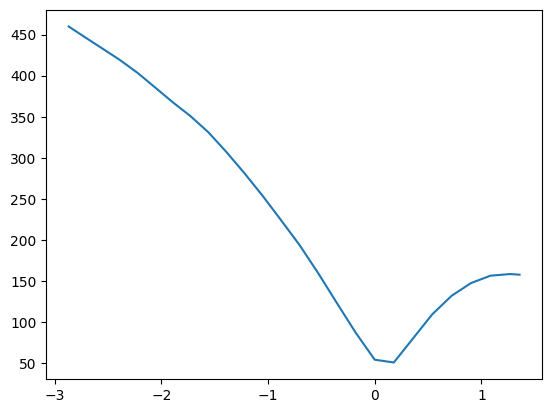

In [46]:
plt.plot(-torb, norm(xyz, axis=1))

In [35]:
# Orbits
orbits = np.loadtxt('../../data/orbits/orbits.pickle')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [2]:

#coefs = pyEXP.coefs.Coefs.factory('/home/ngc/Downloads/coeffs_Halo719.h5')

In [3]:
config = """
---
    id: sphereSL
    parameters:
      numr: 1000
      rmin: 0.25
      rmax: 150
      Lmax: 5
      nmax: 10
      scale: 25
      modelname: ../../data/Halo170/Halo170/dens_table_model_Halo170_224.txt
      cachename: ../../data/Halo170/.slgrid_sph_cache_model_Halo170_224
...
"""

In [4]:
basis = pyEXP.basis.Basis.factory(config)

---- SLGridSph::ReadH5Cache: successfully read basis cache <../../data/Halo170/.slgrid_sph_cache_model_Halo170_224>
SphericalSL::orthoTest: worst=0.0364622


In [5]:
halo_basis = basis.getBasis()

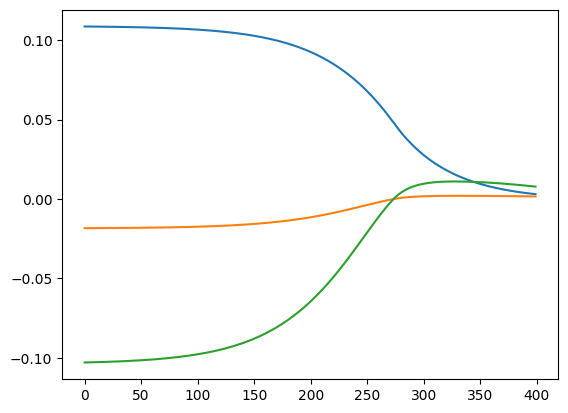

In [6]:
plt.plot(halo_basis[0][0]['density'])
plt.plot(halo_basis[1][0]['density'])
plt.plot(halo_basis[1][1]['density'])

In [7]:
def combine_coefs(file_add, snaps=range(251,601)):
    print(snaps[0])
    coefs_new = pyEXP.coefs.Coefs.factory(file_add + "{:03d}.h5".format(snaps[0]-1))
    
    for nsnap in snaps:
        coef = pyEXP.coefs.Coefs.factory(file_add + "{:03d}.h5".format(nsnap))
        #print(coef.Times())
        coefs_new.add(coef.getCoefStruct(0.0))
    return coefs_new

In [8]:
coefs_new = pyEXP.coefs.Coefs.factory("/home/ngc/Downloads/coeffs_Halo719.h5")

In [9]:
times = coefs_new.Times()

In [10]:
coefs_new.Times()[:]

[-2.71006353,
 -2.54959592,
 -2.3878485,
 -2.22483948,
 -2.06058834,
 -1.89511401,
 -1.72843664,
 -1.56057579,
 -1.39155218,
 -1.22138585,
 -1.05009795,
 -0.87770888,
 -0.70423989,
 -0.52971232,
 -0.35414691,
 -0.17756537,
 0.0,
 0.1785621,
 0.35806524,
 0.53849977,
 0.71984455,
 0.90207859,
 1.08518098,
 1.26913099,
 1.3570815]

In [11]:
coefs_h719 = coefs_new.getAllCoefs()

In [12]:
coefs_h719.shape

(21, 10, 25)

In [13]:
power_h719 = coefs_new.Power()

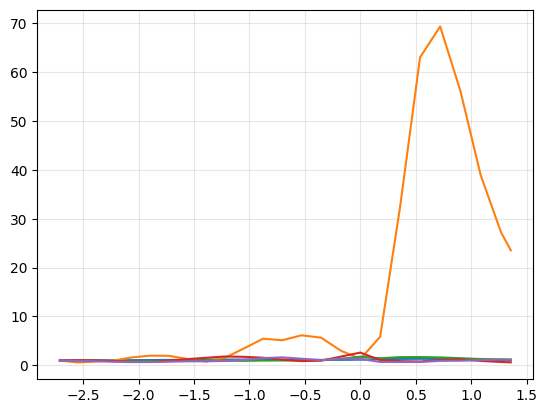

In [14]:
plt.plot(times, power_h719[:,0]/power_h719[0,0])
plt.plot(times, power_h719[:,1]/power_h719[0,1])
plt.plot(times, power_h719[:,2]/power_h719[0,2])
plt.plot(times, power_h719[:,3]/power_h719[0,3])
plt.plot(times, power_h719[:,4]/power_h719[0,4])
plt.grid(alpha=0.3)

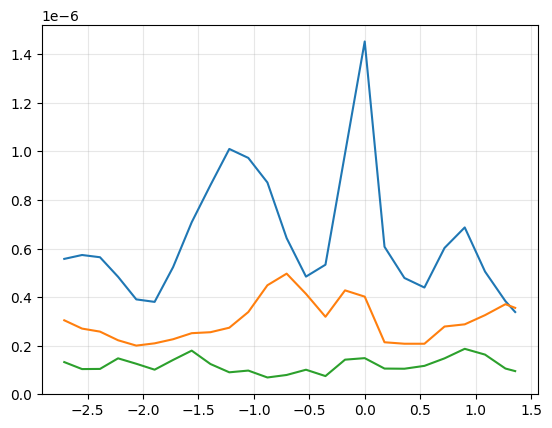

In [15]:
plt.plot(times, power_h719[:,3])
plt.plot(times, power_h719[:,4])
plt.plot(times, power_h719[:,5])

plt.grid(alpha=0.3)

In [16]:
np.sum(coefs_h719[4, :, :].imag**2, axis=0)

array([5.67930527e-07, 6.76993277e-07, 6.59292519e-07, 6.46755729e-07,
       7.74906592e-07, 9.38132198e-07, 1.01384993e-06, 1.21844523e-06,
       1.34312552e-06, 1.47301067e-06, 1.39837784e-06, 1.20085553e-06,
       8.17615342e-07, 5.76771750e-07, 4.21695159e-07, 2.46545441e-07,
       1.03150011e-07, 3.06429997e-07, 6.14619629e-07, 2.38391877e-07,
       1.26452313e-07, 7.94887724e-08, 4.34616160e-08, 2.90016409e-08,
       2.61467349e-08])

/home/ngc/Work/research/codes/EXP/pyexp/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ngc/Work/research/codes/EXP/pyexp/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


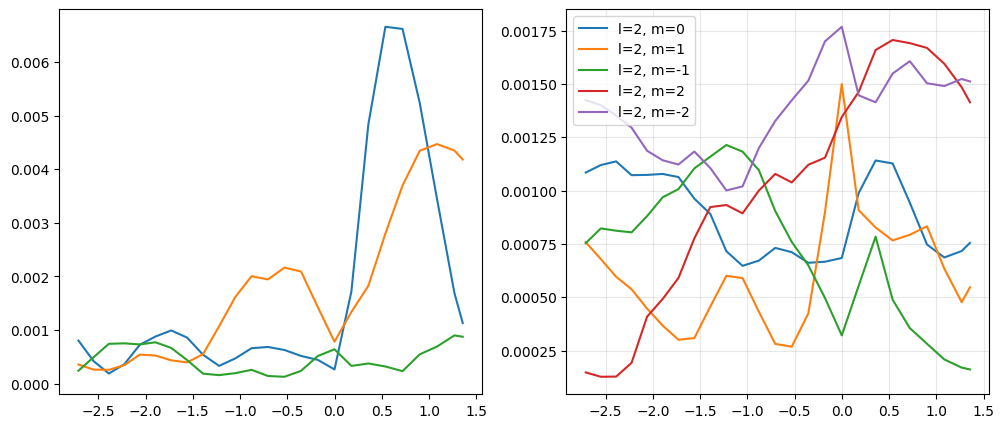

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Dipoles

ax[0].plot(times, np.sqrt(np.sum(coefs_h719[1, :, :]**2, axis=0)), label='l=1, m=0')
ax[0].plot(times, np.sqrt(np.sum(coefs_h719[2, :, :].real**2, axis=0)),  label='l=1, m=1')
ax[0].plot(times, np.sqrt(np.sum(coefs_h719[2, :, :].imag**2, axis=0)), label='l=1, m=-1')

# Quadrupoles

ax[1].plot(times, np.sqrt(np.sum(coefs_h719[3, :, :]**2, axis=0)), label='l=2, m=0')
ax[1].plot(times, np.sqrt(np.sum(coefs_h719[4, :, :].real**2, axis=0)),  label='l=2, m=1')
ax[1].plot(times, np.sqrt(np.sum(coefs_h719[4, :, :].imag**2, axis=0)), label='l=2, m=-1')
ax[1].plot(times, np.sqrt(np.sum(coefs_h719[5, :, :].real**2, axis=0)),  label='l=2, m=2')
ax[1].plot(times, np.sqrt(np.sum(coefs_h719[5, :, :].imag**2, axis=0)), label='l=2, m=-2')
plt.legend()
plt.grid(alpha=0.3)

In [48]:
dens0_XY, dens_XY, grid_XY  = EXPtools.visuals.slice_fields(basis, coefs_new, time=times[20], projection='XY')
dens0_YZ, dens_YZ, grid_YZ  = EXPtools.visuals.slice_fields(basis, coefs_new, time=times[20], projection='YZ')
dens0_XZ, dens_XZ, grid_XZ  = EXPtools.visuals.slice_fields(basis, coefs_new, time=times[20], projection='XZ')


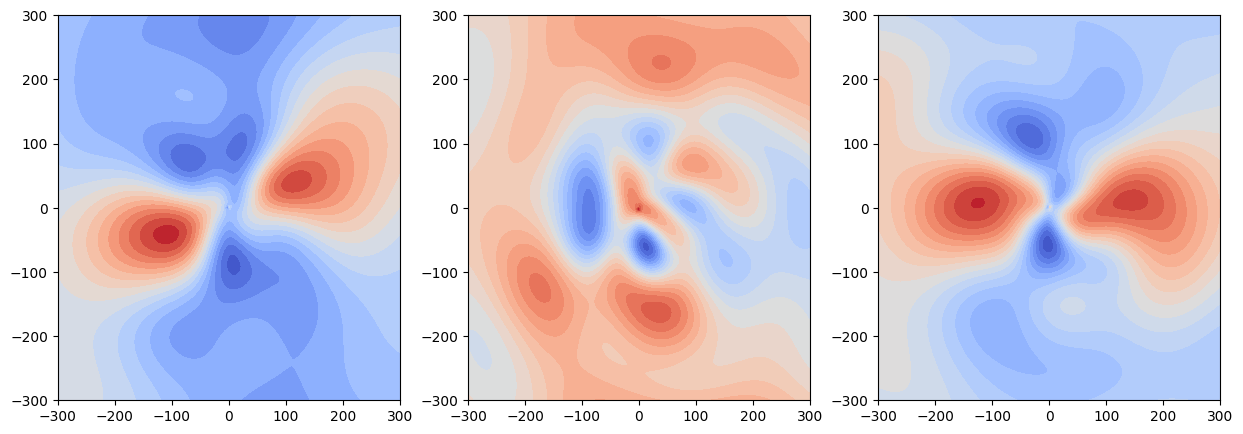

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].contourf(grid_XY[0], grid_XY[1], (dens_XY/dens0_XY), cmap='coolwarm', levels=20)
ax[1].contourf(grid_YZ[0], grid_YZ[1], (dens_YZ/dens0_YZ), cmap='coolwarm', levels=20)
ax[2].contourf(grid_XZ[0], grid_XZ[1], (dens_XZ/dens0_XZ), cmap='coolwarm', levels=20)


(-300.0, 300.0)

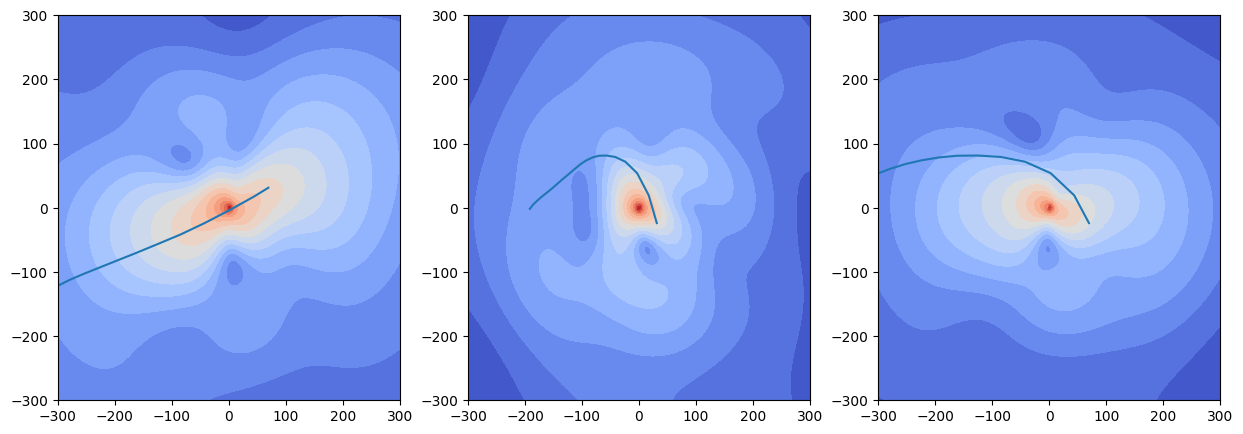

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].contourf(grid_XY[0], grid_XY[1], np.log10(dens_XY), cmap='coolwarm', levels=20)
ax[1].contourf(grid_YZ[0], grid_YZ[1], np.log10(dens_YZ), cmap='coolwarm', levels=20)
ax[2].contourf(grid_XZ[0], grid_XZ[1], np.log10(dens_XZ), cmap='coolwarm', levels=20)
ax[0].plot(xyz[:20,0], xyz[:20,1])
ax[1].plot(xyz[:20,1], xyz[:20,2])
ax[2].plot(xyz[:20,0], xyz[:20,2])
ax[0].set_xlim(-300, 300)
ax[0].set_ylim(-300, 300)
ax[1].set_xlim(-300, 300)
ax[1].set_ylim(-300, 300)
ax[2].set_xlim(-300, 300)
ax[2].set_ylim(-300, 300)

In [59]:
dens3D_all = np.zeros((25, 40, 40, 40))
dens03D_all = np.zeros((25, 40, 40, 40))
fall_all = np.zeros((25, 40, 40, 40))

In [60]:
for t in range(25):
    dens3D_all[t], dens03D_all[t], grid3D = EXPtools.visuals.slice_3d_fields(basis, coefs_new, 
                                                                             time=times[t], 
                                                                             prop='dens', npoints=40)

In [24]:
for t in range(25):
    fxyz, grid3D = EXPtools.visuals.slice_3d_fields(basis, coefs_new, 
                                                          time=times[t], 
                                                          prop='force', npoints=40)
    fall_all[t] = np.sqrt(fxyz[0]**2 + fxyz[1]**2 + fxyz[2]**2 ) 

In [30]:
np.max(np.log10(fall_all))

-5.351790904502249

In [65]:
rend3D = EXPtools.visuals.field3Drender((np.abs(dens3D_all)/np.abs(dens03D_all)) - 1, 
                                        contour_ranges=[[-0.8, 0.8],[-0.2, 0.2]], 
                                        size=[200, 200, 200], contour_alphas=[2, 1],
                                       orbits=[xyz], orbits_names=['Satellite'])

In [66]:
rend3D

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [33]:
rend3D = EXPtools.visuals.field3Drender(np.log10(fall_all), 
                                        contour_ranges=[[-7, -5.3],[-6, -5.5]], 
                                        size=[200, 200, 200], contour_alphas=[2, 1])

In [34]:
rend3D

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [24]:
## Visualize dipole

In [25]:
## Visualize monopole

### SSA

In [26]:
times = coefs_new.Times()
data  = coefs_new.getAllCoefs()


In [27]:
np.shape(data)

(21, 10, 25)

In [28]:
keylst0 = coefs_new.makeKeys([1])
print(keylst0)

[[1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 0, 5], [1, 0, 6], [1, 0, 7], [1, 0, 8], [1, 0, 9], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7], [1, 1, 8], [1, 1, 9]]


In [29]:
config = {"cosine": (coefs_new, keylst0, [])}
# Window size is half the time series (a good default choice if it’s practical)
window = int(len(coefs_new.Times())/2)
# Only compute the first 10 PCs
npc = 5
# An an example of making YAML config flags (commented out here)
flags = """
# Jacobi: true
# Traj: true
"""
# Initialize the MSSA and compute the eigenvalues
ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)
ev = ssa.eigenvalues()
print(ev)
ssa.reconstruct([0])

---- Eigen is using 8 threads
shape U = 360 x 5
[100.33961339  57.43296488  39.75944498  27.69660597  15.32031084]


Text(0.5, 1.0, 'Eigenvalues by index l=1, window=t/2.')

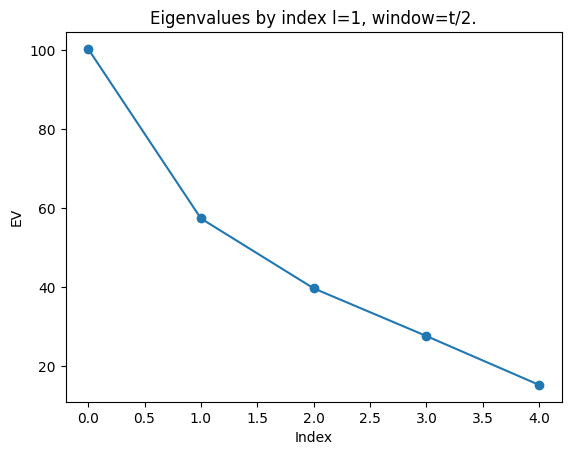

In [30]:
plt.plot(ev, 'o-')
plt.xlabel("Index")
plt.ylabel("EV")
plt.title("Eigenvalues by index l=1, window=t/2.")

In [31]:
freq, power = ssa.pcDFT()

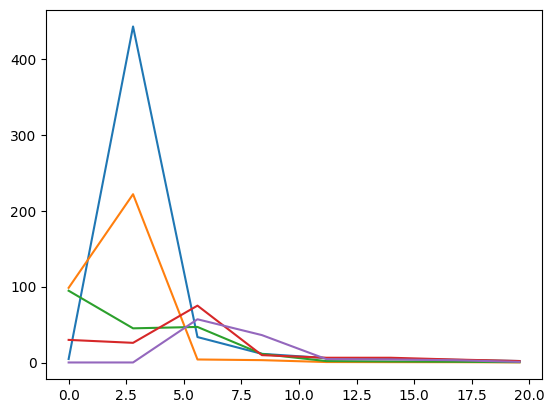

In [32]:
plt.plot(freq, power)

In [33]:
mat

<function numpy.asmatrix(data, dtype=None)>

Text(0.5, 1.0, 'l=1,2, window=t/2.')

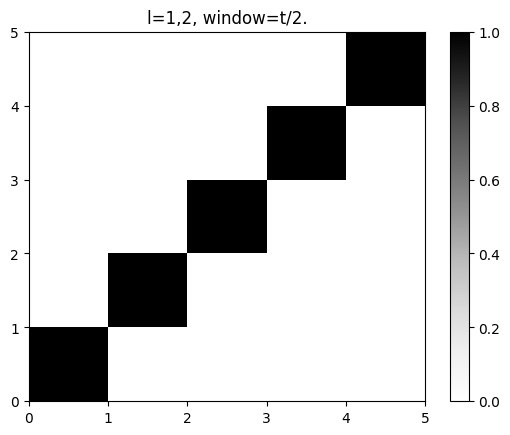

In [34]:
mat = ssa.wCorrAll()
x = plt.pcolormesh(mat, cmap='Greys')
plt.colorbar(x)
plt.title('l=1,2, window=t/2.')
#plt.savefig('wcorr_l_1-2_gc19_nmax1

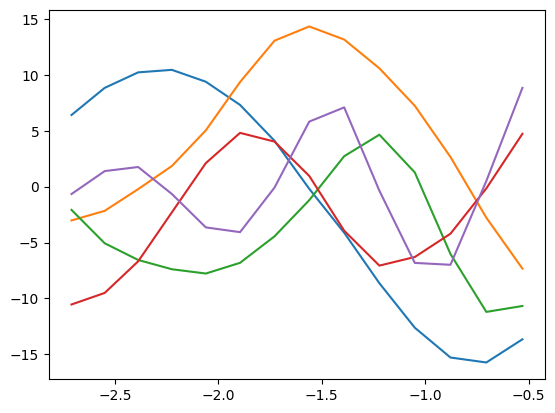

In [35]:
pcs = ssa.getPC()
ntim = pcs.shape[0]
for n in range(0, 5):
    plt.plot(times[0:ntim], pcs[:,n], label=str(n))
#plt.show()

In [36]:
ssa.reconstruct([0, 1])

In [117]:
def pcs_densities(sisa, coeficients, basis, rhomon, pcs, proj, t=2.1,  figname=None):
    """
    
    TODO: remove suplots that are not used
    
    """

    npcs = len(pcs)

    
    nrows = int(npcs/4) + 1 
    ncols = 4
    print('computing {} pcs'.format(npcs))
    fig, ax = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows), sharex=True, sharey=True)
    fig.patch.set_facecolor('w')
    
    axs = ax.flatten()
    
    axs[npcs].set_xlim(-300, 300) 
    axs[npcs].set_ylim(-300, 300)
    axs[npcs].set_xlabel(r'$\rm{y[kpc]}$', fontsize=25)
    axs[0].set_ylabel(r'$\rm{z[kpc]}$', fontsize=25)

    for p in range(npcs):
    
        sisa.reconstruct(pcs[p])
        #coeficients.zerodata() # <---replace with reconstructed
        sisa.getReconstructed()

        rho_mon_pcn, rho_all_pcn, grid  = EXPtools.visuals.slice_fields(basis, coeficients, time=t, projection=proj)

        #print(rho_mon_pcn)
        #plt.plot(pos[:,1]-posm[:,1], pos[:,2]-posm[:,2], c='k')
        #im = axs[p].contourf(grid[0], grid[1], (rhomon+rho_all_pcn)/rhomon - 1, 
        #                     levels=np.linspace(-4, 4, 101), 
        #                     cmap='RdBu_r', vmin=-4, vmax=4)
        im = axs[p].contourf(grid[0], grid[1], (rhomon-rho_all_pcn)/rhomon - 1, 
                             levels=np.linspace(-3, 0, 101), 
                             cmap='RdBu_r', vmin=-3, vmax=0)

        
        cbar = fig.colorbar(im, ax=axs[p])
        cbar.set_label(r'$\delta \rho$')
        if len(pcs[p]) > 3:
            
            axs[p].set_title(r'$l=[1, 2], pc: {}$'.format(str(pcs[p][0]) +  ":" + str(pcs[p][-1])))
        else:
            axs[p].set_title(r'$l=[1, 2], pc: {}$'.format(str(pcs[p])))

    for t in range(p+1, nrows*ncols): 
        fig.delaxes(axs[t])
    
    if figname != None:
        plt.savefig(figname, bbox_inches='tight')

In [ ]:
for t in range(25):
    coefs_copy = coefs_new.deepcopy()
    dens0_XY, dens_XY, grid_XY  = EXPtools.visuals.slice_fields(basis, coefs_copy, time=times[t], projection='XY')
    pcs_densities(ssa, coefs_new, basis, dens_XY, pcs=[[0, 1]], proj='XY', t=times[t])

computing 1 pcs
computing 1 pcs
computing 1 pcs
computing 1 pcs
computing 1 pcs
computing 1 pcs


In [ ]:
for t in range(25):
    coefs_copy = coefs_new.deepcopy()
    dens0_XY, dens_XY, grid_XY  = EXPtools.visuals.slice_fields(basis, coefs_copy, time=times[t], projection='YZ')
    pcs_densities(ssa, coefs_new, basis, dens_XY, pcs=[[0, 1]], t=times[t])